# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import time
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
# Create cities as a List of Dictionaries with key {city}, values: [lat, lng, country]
lat_lngs = []
only_cities = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_data.city_name
    country = city_data.country_code
      
# If the city is unique, then add it to a our cities list
    if city not in only_cities:
        only_cities.append(city)
#         cities.append({city:[lat_lng[0],lat_lng[1],country]})
        cities.append({city:[country]})

# Print the city count to confirm sufficient count
print(len(cities))
# print(len(lats))

cities

599


[{'albany': ['au']},
 {'oranjestad': ['aw']},
 {'ballarat': ['au']},
 {'jamestown': ['sh']},
 {'rikitea': ['pf']},
 {'severo-kurilsk': ['ru']},
 {'hithadhoo': ['mv']},
 {'razole': ['in']},
 {'bilma': ['ne']},
 {'lalibela': ['et']},
 {'khatanga': ['ru']},
 {'pyapon': ['mm']},
 {'bredasdorp': ['za']},
 {'new norfolk': ['au']},
 {'ahipara': ['nz']},
 {'mataura': ['pf']},
 {'sitka': ['us']},
 {'homer': ['us']},
 {'qui nhon': ['vn']},
 {'vaini': ['to']},
 {'busselton': ['au']},
 {'bethel': ['us']},
 {'pevek': ['ru']},
 {'aripuana': ['br']},
 {'punta arenas': ['cl']},
 {'avarua': ['ck']},
 {'butaritari': ['ki']},
 {'norman wells': ['ca']},
 {'hobart': ['au']},
 {'port elizabeth': ['za']},
 {'gardez': ['af']},
 {'haines junction': ['ca']},
 {'mar del plata': ['ar']},
 {'lalmohan': ['bd']},
 {'beipiao': ['cn']},
 {'olinda': ['br']},
 {'cedar city': ['us']},
 {'ushuaia': ['ar']},
 {'thompson': ['ca']},
 {'lamar': ['us']},
 {'paveh': ['ir']},
 {'salalah': ['om']},
 {'abu kamal': ['sy']},
 {'noua

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Use Open Weather API to access weather data

# Get temperature in Fahrengeit
units="imperial"

# Specify the query url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Get All needed weather parameters for each city
print("Beginning Data Retrieval")
print("--------------------------------")

# Set data for loop - record counter and copy of cities list
cities_copy = [city for city in cities]
record_id=0

# Iterate through cities copy to get weather data for each city
for city in cities_copy:

    # Get Key from city Dictionary to get the city name    
    for key in city:
        
        try:
            print(f"Processing Record {record_id} | {key}")

            # Try all required responses first
            response = requests.get(url+key).json()
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            temp = response["main"]["temp_max"]
            hum = response["main"]["humidity"]
            cld = response["clouds"]["all"]
            wind = response["wind"]["speed"]
            dt = response["dt"]

            # Add values to city dictionary
            city[key].append(lat)
            city[key].append(lng)
            city[key].append(temp)
            city[key].append(hum)
            city[key].append(cld)
            city[key].append(wind)
            city[key].append(dt)
            
        # Catch exception if data for city is not foud in openweather API   
        except:
            
            print(f"City {key} not found. Skipping...")
            
            # Remove this city from cities list
            cities.remove(city)    
            
    record_id+=1
    
print("--------------------------------")        
print("Data Retrieval Complete")
print("--------------------------------")
print(len(cities))
cities

Beginning Data Retrieval
--------------------------------
Processing Record 0 | albany
Processing Record 1 | oranjestad
Processing Record 2 | ballarat
Processing Record 3 | jamestown
Processing Record 4 | rikitea
Processing Record 5 | severo-kurilsk
Processing Record 6 | hithadhoo
Processing Record 7 | razole
Processing Record 8 | bilma
Processing Record 9 | lalibela
Processing Record 10 | khatanga
Processing Record 11 | pyapon
Processing Record 12 | bredasdorp
Processing Record 13 | new norfolk
Processing Record 14 | ahipara
Processing Record 15 | mataura
Processing Record 16 | sitka
Processing Record 17 | homer
Processing Record 18 | qui nhon
Processing Record 19 | vaini
Processing Record 20 | busselton
Processing Record 21 | bethel
Processing Record 22 | pevek
Processing Record 23 | aripuana
Processing Record 24 | punta arenas
Processing Record 25 | avarua
Processing Record 26 | butaritari
Processing Record 27 | norman wells
Processing Record 28 | hobart
Processing Record 29 | port 

Processing Record 232 | san quintin
Processing Record 233 | torbay
Processing Record 234 | comodoro rivadavia
Processing Record 235 | uruzgan
Processing Record 236 | waimana
Processing Record 237 | khani
Processing Record 238 | hope
Processing Record 239 | attawapiskat
City attawapiskat not found. Skipping...
Processing Record 240 | borgarnes
Processing Record 241 | simpang
Processing Record 242 | poli
Processing Record 243 | vaitupu
City vaitupu not found. Skipping...
Processing Record 244 | avera
Processing Record 245 | kerrville
Processing Record 246 | tignere
Processing Record 247 | bousso
Processing Record 248 | maridi
Processing Record 249 | skala
Processing Record 250 | ocara
Processing Record 251 | cabedelo
Processing Record 252 | bell ville
Processing Record 253 | grand centre
City grand centre not found. Skipping...
Processing Record 254 | ilulissat
Processing Record 255 | lavrentiya
Processing Record 256 | rosarito
Processing Record 257 | mantua
Processing Record 258 | korla

Processing Record 447 | cherskiy
Processing Record 448 | saurimo
Processing Record 449 | balkhash
Processing Record 450 | aguimes
Processing Record 451 | lata
Processing Record 452 | coetupo
City coetupo not found. Skipping...
Processing Record 453 | shouguang
Processing Record 454 | okhotsk
Processing Record 455 | peleduy
Processing Record 456 | klaksvik
Processing Record 457 | sayyan
Processing Record 458 | porbandar
Processing Record 459 | hualmay
Processing Record 460 | baculin
Processing Record 461 | moree
Processing Record 462 | harboore
Processing Record 463 | monteagudo
Processing Record 464 | tautira
Processing Record 465 | havelock
Processing Record 466 | verkhnevilyuysk
Processing Record 467 | kazanka
Processing Record 468 | catio
Processing Record 469 | praya
Processing Record 470 | gornyy
Processing Record 471 | tabuk
Processing Record 472 | karanja
Processing Record 473 | gewane
Processing Record 474 | sorvag
City sorvag not found. Skipping...
Processing Record 475 | belm

[{'albany': ['au', 42.6001, -73.9662, 84.54, 75, 46, 3.06, 1627247018]},
 {'oranjestad': ['aw', 12.524, -70.027, 85.95, 70, 20, 10.36, 1627247633]},
 {'ballarat': ['au', -37.5662, 143.8496, 48.18, 94, 99, 8.99, 1627247634]},
 {'jamestown': ['sh', 42.097, -79.2353, 84.09, 57, 1, 11.5, 1627247016]},
 {'rikitea': ['pf', -23.1203, -134.9692, 70.88, 67, 25, 5.03, 1627247027]},
 {'severo-kurilsk': ['ru', 50.6789, 156.125, 56.05, 94, 85, 3.51, 1627247173]},
 {'hithadhoo': ['mv', -0.6, 73.0833, 80.69, 75, 85, 4.52, 1627247160]},
 {'razole': ['in', 16.4833, 81.8333, 80.96, 79, 63, 4.76, 1627247635]},
 {'bilma': ['ne', 18.6853, 12.9164, 80.06, 72, 96, 6.11, 1627247636]},
 {'lalibela': ['et', 12.0333, 39.0333, 56.86, 93, 100, 1.7, 1627247636]},
 {'khatanga': ['ru', 71.9667, 102.5, 50.18, 82, 43, 5.97, 1627247041]},
 {'pyapon': ['mm', 16.2833, 95.6833, 79.2, 83, 100, 12.17, 1627247637]},
 {'bredasdorp': ['za', -34.5322, 20.0403, 51.28, 47, 100, 5.41, 1627247638]},
 {'new norfolk': ['au', -42.7826,

In [ ]:
# Test cell
response = requests.get(url+'casa nova').json()
response

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Create an empty DataFrame with required columns
city_weather = pd.DataFrame(
    columns=["Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])

# Add data for each city into DataFrame via df.append()
for city in cities:
    
    # Create DataFrame from city Dictionary with orient=index to have key as an index     
    city_df = pd.DataFrame.from_dict(
        city,
        orient = 'index',
        columns=["Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"])
  
    city_weather = city_weather.append(city_df)

city_weather.index.name = "City"

city_weather.to_csv("Output/city_weather.csv")

city_weather

,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
albany,au,42.6001,-73.9662,84.54,75,46,3.06,1627247018
oranjestad,aw,12.5240,-70.0270,85.95,70,20,10.36,1627247633
ballarat,au,-37.5662,143.8496,48.18,94,99,8.99,1627247634
jamestown,sh,42.0970,-79.2353,84.09,57,1,11.50,1627247016
rikitea,pf,-23.1203,-134.9692,70.88,67,25,5.03,1627247027
...,...,...,...,...,...,...,...,...
alyangula,au,-13.8483,136.4192,69.94,73,93,11.07,1627247851
tiarei,pf,-17.5333,-149.3333,82.42,68,1,8.81,1627247852
sardarshahr,in,28.4333,74.4833,92.70,53,58,11.32,1627247852


In [11]:
len(city_weather)

542

In [12]:
# convert to float
city_weather["Humidity"] = city_weather["Humidity"].astype(float)
city_weather["Cloudiness"] = city_weather["Cloudiness"].astype(float)
city_weather["Wind Speed"] = city_weather["Wind Speed"].astype(float)

# Add statistics
city_weather.describe()

,Lat,Lang,Max Temp,Humidity,Cloudiness,Wind Speed
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,17.962686,18.480425,70.752066,69.073801,50.806273,7.851181
std,32.658831,92.245793,14.802141,21.044230,39.757087,5.199267
min,-54.800000,-175.200000,34.930000,5.000000,0.000000,0.000000
25%,-9.537275,-62.919700,60.315000,58.000000,8.000000,4.270000
50%,20.509550,21.004050,72.260000,74.000000,53.500000,6.760000
75%,43.295950,101.775225,80.677500,85.000000,94.000000,10.562500
max,78.218600,179.316700,106.210000,100.000000,100.000000,33.820000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
hum_df = pd.DataFrame(city_weather)

# insert humidity > 100 to test
# hum_df.iloc[5,4]=110
# hum_df.iloc[2,4]=120
# hum_df.iloc[28,4]=101
# hum_df.iloc[0,4]=103
# hum_df

In [33]:
# check humidity
humidity_is_greater_100 = False

indices = []
for index, row in hum_df.iterrows():
    if hum_df.loc[index,"Humidity"]>100:
        indices.append(index)
        humidity_is_greater_100 = True
indices

[]

In [34]:
if humidity_is_greater_100:
    clean_df = hum_df.drop(indices, inplace = False)
else:
    clean_df = pd.DataFrame(city_weather)
clean_df

,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
albany,au,42.6001,-73.9662,84.54,75,46,3.06,1627247018
oranjestad,aw,12.5240,-70.0270,85.95,70,20,10.36,1627247633
ballarat,au,-37.5662,143.8496,48.18,94,99,8.99,1627247634
jamestown,sh,42.0970,-79.2353,84.09,57,1,11.50,1627247016
rikitea,pf,-23.1203,-134.9692,70.88,67,25,5.03,1627247027
...,...,...,...,...,...,...,...,...
alyangula,au,-13.8483,136.4192,69.94,73,93,11.07,1627247851
tiarei,pf,-17.5333,-149.3333,82.42,68,1,8.81,1627247852
sardarshahr,in,28.4333,74.4833,92.70,53,58,11.32,1627247852


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [16]:
# Get the date of analysis
analysis_date = date.today()

# Define function to adjust y_labels
def label(y_label):
    switch = {
        "Max Temperature": "Max Temperature (F)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (mph)"
    }
    return switch.get(y_label)

# Define function to build a scatter plot and to save to .png file
def scatter(y_value, y_label):
    ax = clean_df.plot(kind = "scatter", x = "Lat", y = y_value,
              title = f"City Latitude vs. {y_label} ({analysis_date})",
                      marker = "o", s=35, facecolor="teal", edgecolor = "black", grid = True)
    ax.set_xlabel("Latitude")
    y_label
    ax.set_ylabel(label(y_label))
    fig = ax.get_figure()
    fig.savefig(f"Output/Lat_{y_label}.png")

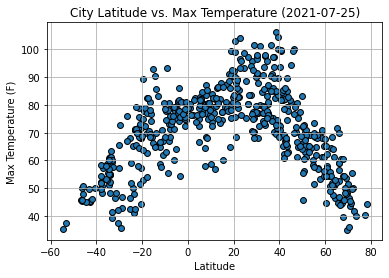

In [17]:
scatter("Max Temp", "Max Temperature")

#### Latitude vs. Temperature Plot shows that the closer city is to the Equator (zero latitude) the higher the Max Temperature is.

## Latitude vs. Humidity Plot

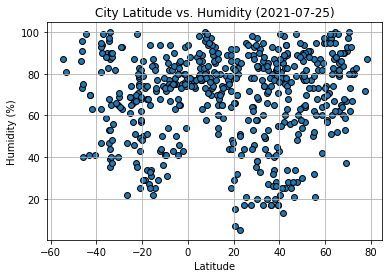

In [18]:
scatter("Humidity", "Humidity")

#### Latitude vs. Humidity Plot shows that the closer city is to the Equator (zero latitude) the lower the Humidity is.

## Latitude vs. Cloudiness Plot

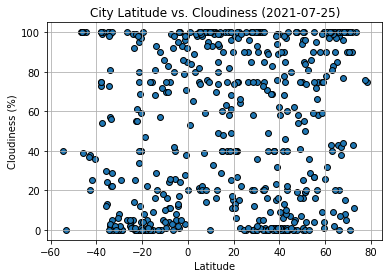

In [21]:
scatter("Cloudiness","Cloudiness")

#### Latitude vs. Cloudiness Plot shows that the ?

## Latitude vs. Wind Speed Plot

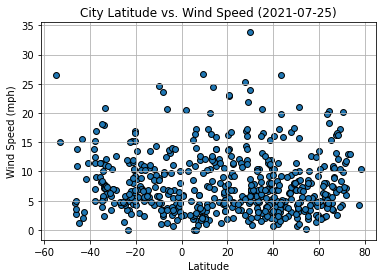

In [22]:
scatter("Wind Speed", "Wind Speed")

#### Latitude vs. Wind Speed Plot shows that cities in the Southern Hemisphere have higher measurements of Wind Speed.

## Linear Regression

In [23]:
# Add function that calculates linear regreassion

# Calculate correlation usong scipy pearsonr method
def correlation(var1, var2):
    r_value = st.pearsonr(var1, var2)
    print(f"The r-value is {round(r_value[0],2)}")
    return r_value

# Calculate linear regression equation
def regression(var1, var2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(var1, var2)
    regress_values = var1 * slope + intercept
    return regress_values

def scatter_plot(dataFrame, x_value, y_value, regrX_values, regrY_values, x_label, y_label):
    plot = dataFrame.plot.scatter(x = x_value, y = y_value, s=40)
    plot.set_title(f"Linear Regression Model btw {y_label} and {x_label}")
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plt.plot(regrX_values,regrY_values,"r-")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.64


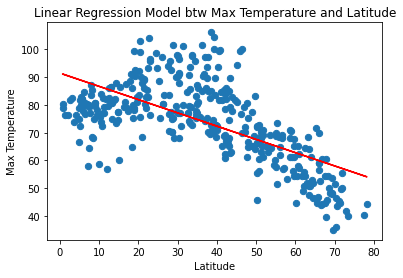

In [24]:
north_hem = clean_df.loc[clean_df["Lat"]>=0]

north_lat = north_hem["Lat"]
north_max_temp = north_hem["Max Temp"]

correlation(north_lat, north_max_temp)

scatter_plot(north_hem, "Lat", "Max Temp", north_lat,
             regression(north_lat, north_max_temp), "Latitude", "Max Temperature")

* There is a strong negative correlation between Max Temp and Latitude in Northern Hemisphere.
* That means that the more to the North the city is the less Max Temp it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.74


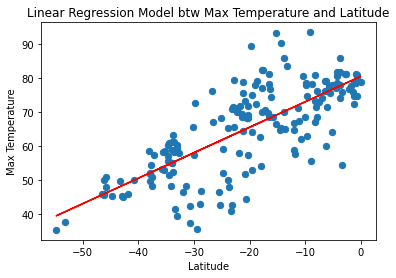

In [25]:
south_hem = clean_df.loc[clean_df["Lat"]<=0]

south_lat = south_hem["Lat"]
south_max_temp = south_hem["Max Temp"]

correlation(south_lat, south_max_temp)

scatter_plot(south_hem, "Lat", "Max Temp", south_lat,
             regression(south_lat, south_max_temp), "Latitude", "Max Temperature")

There is a strong positive correlation between Max Temp and Latitude in Southern Hemisphere.
That means that the more to the South the city is the greater Max Temp gets

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.01


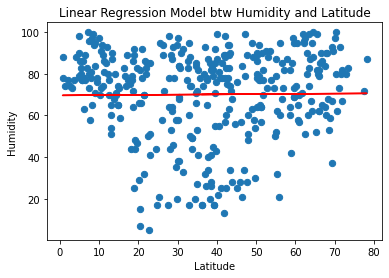

In [26]:
north_humidity = north_hem["Humidity"]

correlation(north_lat, north_humidity)

scatter_plot(north_hem, "Lat", "Humidity", north_lat,
             regression(north_lat, north_humidity), "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.06


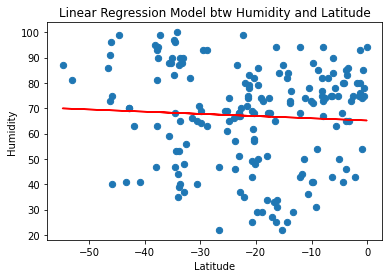

In [27]:
south_humidity = south_hem["Humidity"]

correlation(south_lat, south_humidity)

scatter_plot(south_hem, "Lat", "Humidity", south_lat,
             regression(south_lat, south_humidity), "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.07


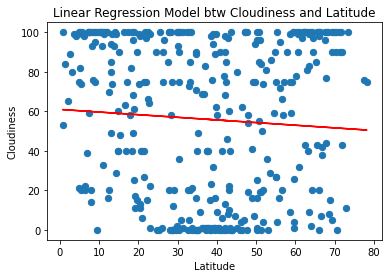

In [28]:
north_cloud = north_hem["Cloudiness"]

correlation(north_lat, north_cloud)

scatter_plot(north_hem, "Lat", "Cloudiness", north_lat,
             regression(north_lat, north_cloud), "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.05


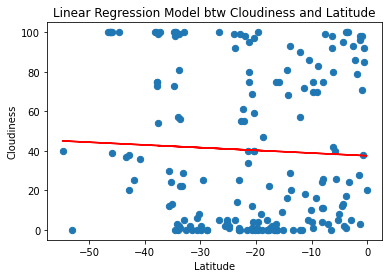

In [29]:
south_cloud = south_hem["Cloudiness"]

correlation(south_lat, south_cloud)

scatter_plot(south_hem, "Lat", "Cloudiness", south_lat,
             regression(south_lat, south_cloud), "Latitude", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.02


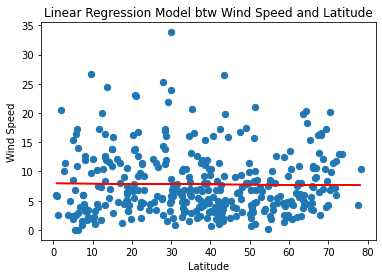

In [30]:
north_wind = north_hem["Wind Speed"]

correlation(north_lat, north_wind)

scatter_plot(north_hem, "Lat", "Wind Speed", north_lat,
             regression(north_lat, north_wind), "Latitude", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.18


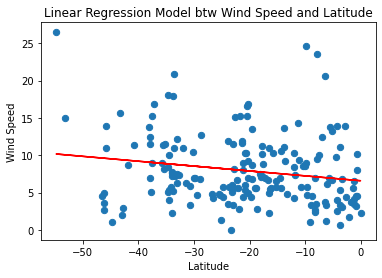

In [31]:
south_wind = south_hem["Wind Speed"]

correlation(south_lat, south_wind)

scatter_plot(south_hem, "Lat", "Wind Speed", south_lat,
             regression(south_lat, south_wind), "Latitude", "Wind Speed")